In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math

import scipy
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from data_plotting_func import *
#from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [4]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']'''

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']'''

"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', \n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',\n     

## all on one plot

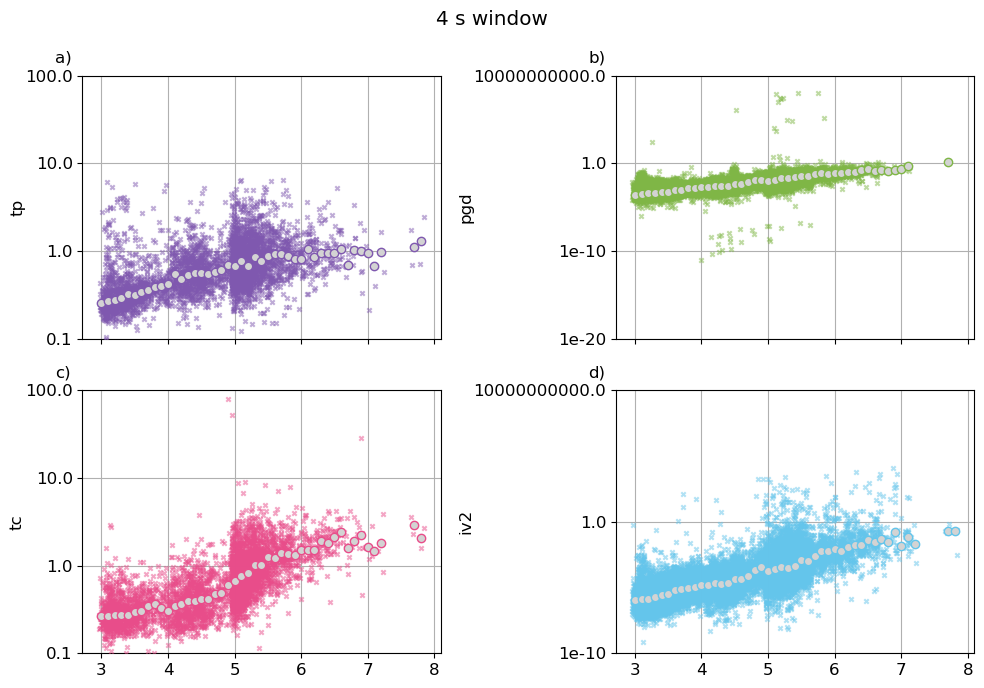

In [32]:
    fig, axs = plt.subplots(2,2,figsize = figure_sizes.a4landscape, sharex = True)
    time = name_to_time(f)
    snr = name_to_snr(f)
    blank = name_to_blank(f)
    for i in range(0, 4):
        row = i//2
        col = i%2
        axs[row][col].grid(True)
        axs[row][col].scatter(x_list[i]+np.random.uniform(-0.05, 0.05, len(x_list[i])), y_list[i], marker = 'x', color = colors[types[i]], s = 10, alpha = 0.5, zorder = 100)
        axs[row][col].set_ylabel(types[i], fontsize = 12, labelpad = 0)
        axs[row][col].tick_params(axis='both', which='major', labelsize=12)
        axs[row][col].set_xticks([3,4,5,6,7,8], zorder = 110)
        median, bin_edges, bin_number = scipy.stats.binned_statistic(x_list[i], y_list[i], statistic='median', bins=np.arange(2.95,8.05,0.1), range=None)
        axs[row][col].scatter(bin_edges[:-1]+0.05, median, marker = 'o', facecolor = 'lightgrey', edgecolors = colors[types[i]], zorder = 1000)
    import matplotlib.transforms as mtransforms
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    axs[0][0].text(0.0, 1.0, 'a)', transform=axs[0][0].transAxes + trans,
                fontsize='12', va='bottom')
    axs[0][1].text(0.0, 1.0, 'b)', transform=axs[0][1].transAxes + trans,
                fontsize='12', va='bottom')
    axs[1][0].text(0.0, 1.0, 'c)', transform=axs[1][0].transAxes + trans,
                fontsize='12', va='bottom')
    axs[1][1].text(0.0, 1.0, 'd)', transform=axs[1][1].transAxes + trans,
                fontsize='12', va='bottom')
    #y = ax.get_yticks()


    
    axs[0][0].set_yticks([-1,0,1,2],[1e-1, 1e+0, 1e+1,1e+2])
    axs[0][0].set_ylim([-1,2])
    axs[1][0].set_yticks([-1,0,1,2],[1e-1, 1e+0, 1e+1,1e+2])
    
    t = axs[0][1].get_yticks()
    axs[0][1].set_yticks(np.arange(np.floor(t[0]/10)*10,np.ceil(t[-1]/10)*10+1, 10))
    t = axs[1][1].get_yticks()
    axs[1][1].set_yticks(np.arange(np.floor(t[0]/10)*10,np.ceil(t[-1]/10)*10+1, 10))
    axs[0][1].set_yticklabels(10**axs[0][1].get_yticks())
    axs[1][1].set_yticklabels(10**axs[1][1].get_yticks())
    
    axs[0][0].set_ylim([-1,2])
    axs[0][1].set_ylim([-1,2])
    axs[1][0].set_ylim([-1,2])
    axs[1][1].set_ylim([-1,2])
    
    fig.suptitle(f'{name_to_time(f)} s window')      
    figure = plt.gcf()
    figure.set_size_inches(figure_sizes.a4landscape)
    figure.tight_layout()
    #plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/data_subplots/two_lines_{time}_blankwindow_{name_to_blank(f)}_snr{snr}.pdf')
    plt.show()

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


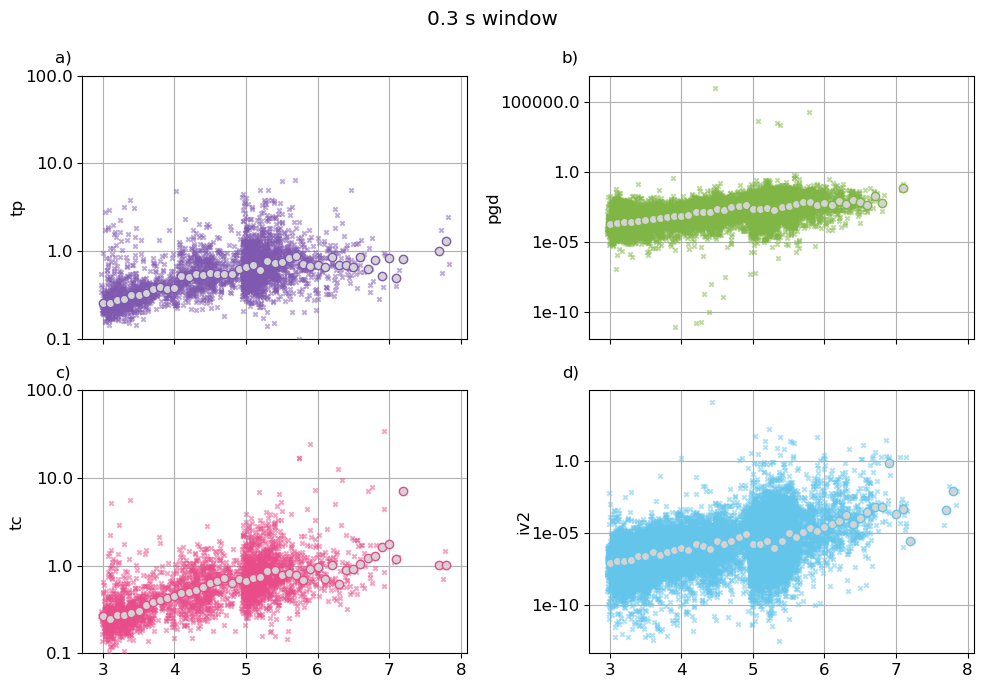

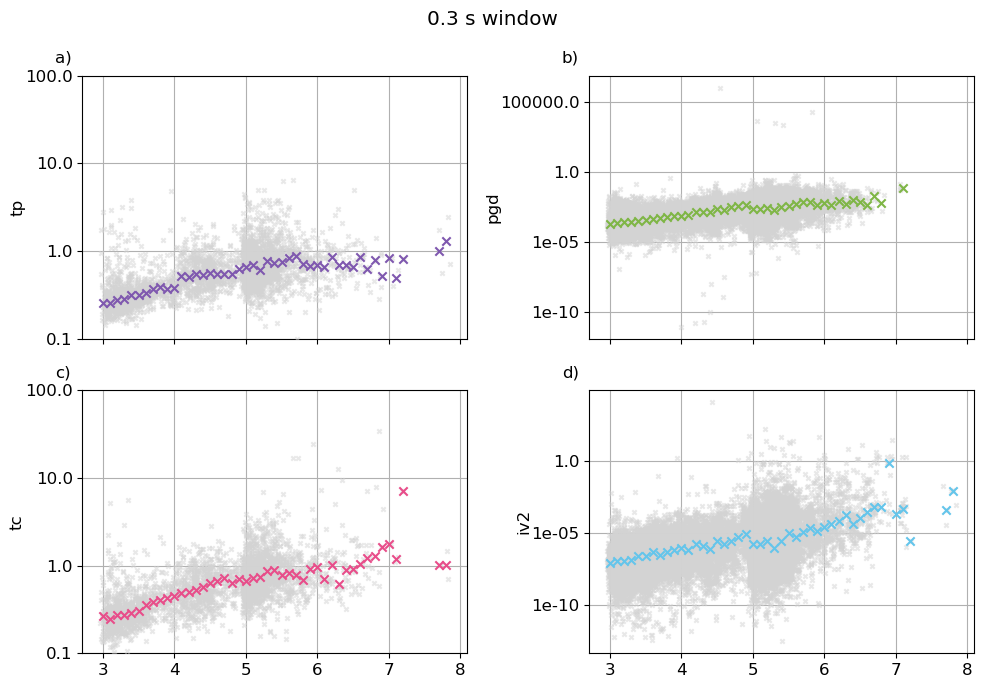

eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20


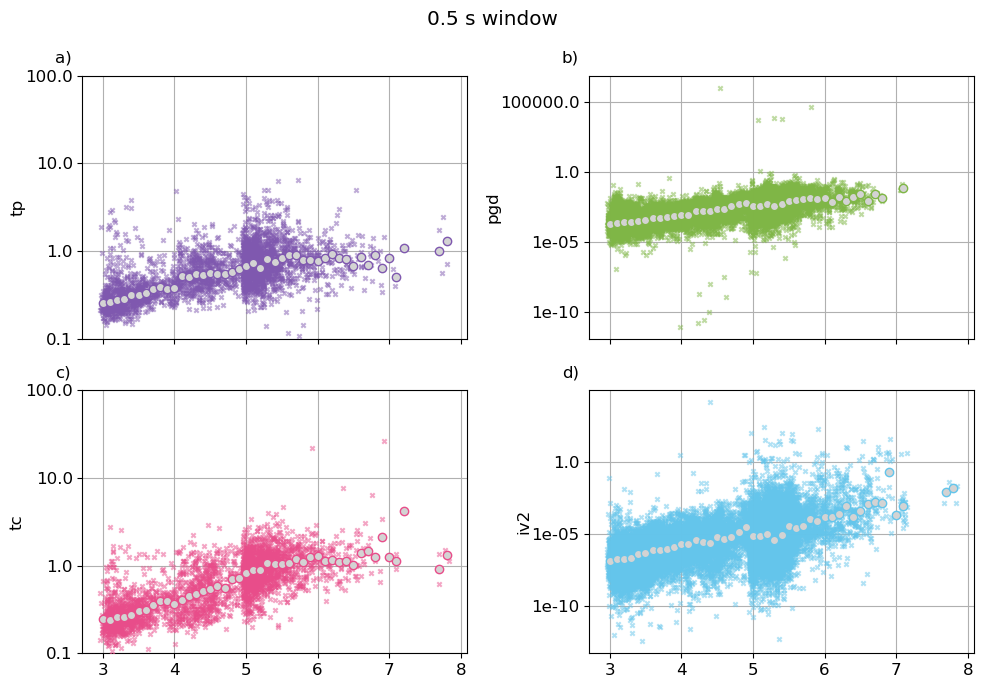

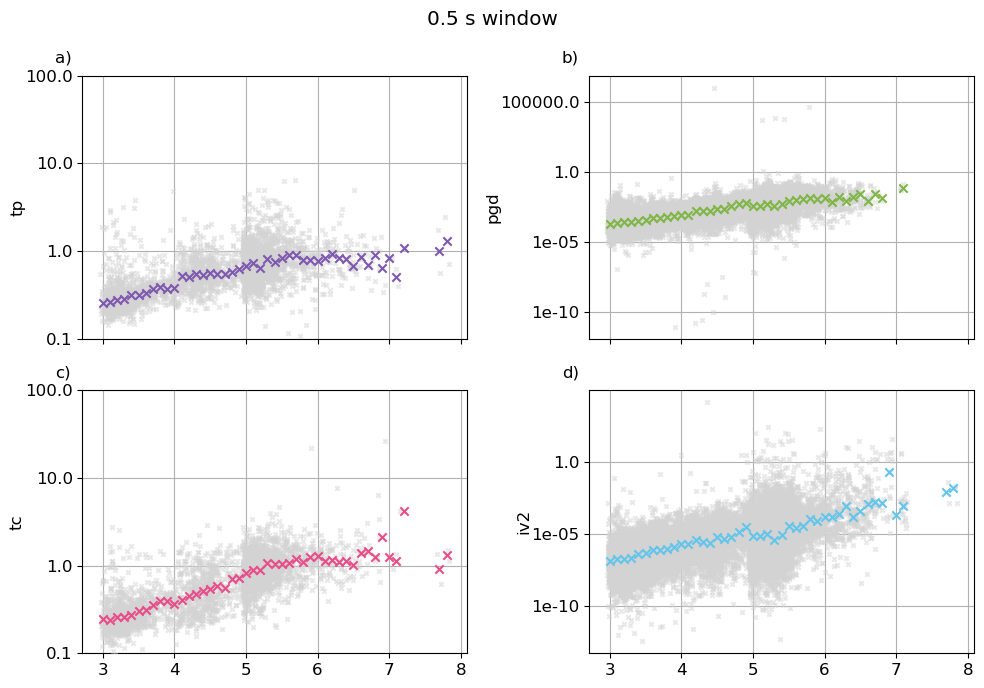

eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20


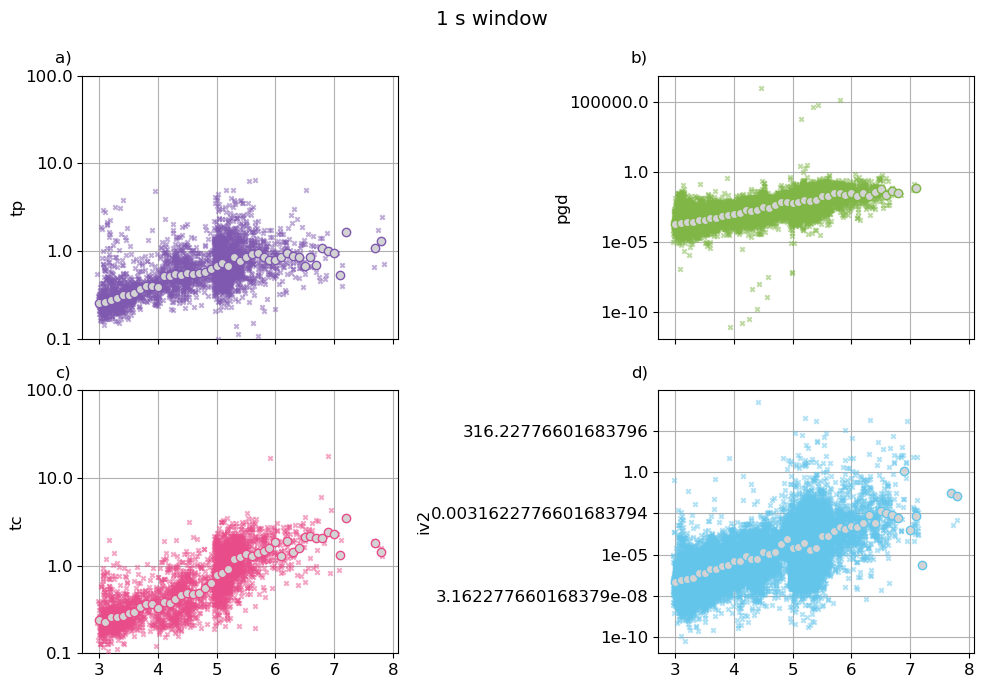

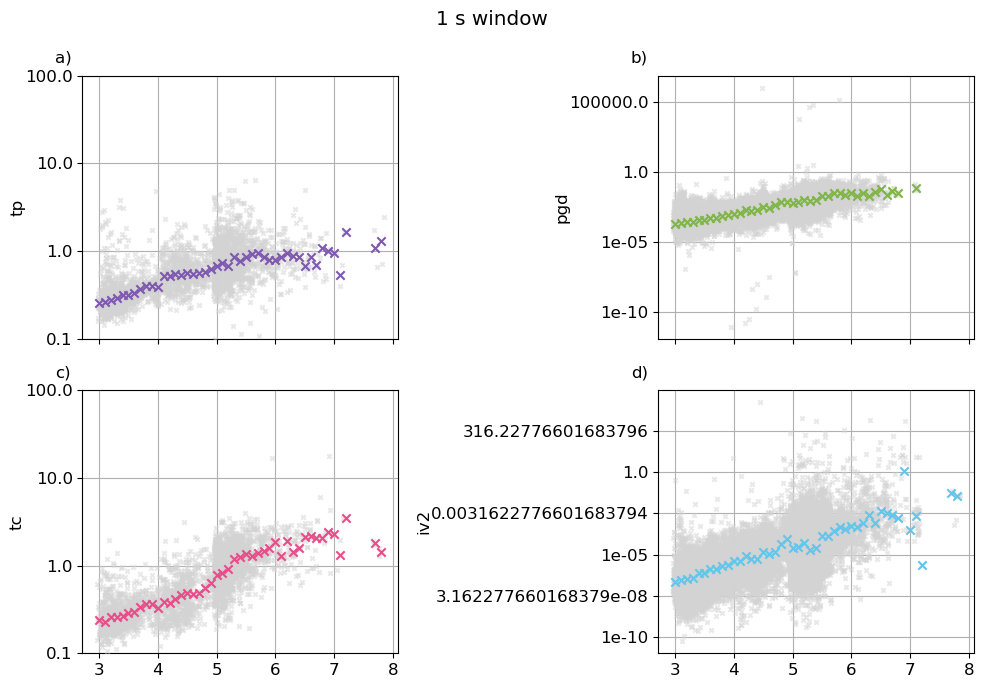

eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20


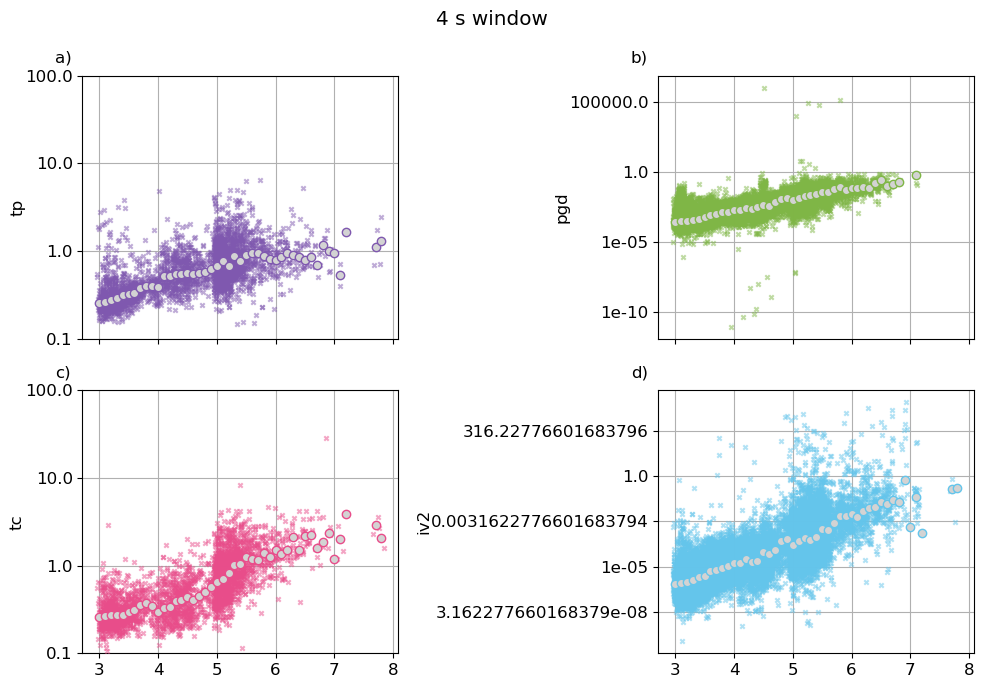

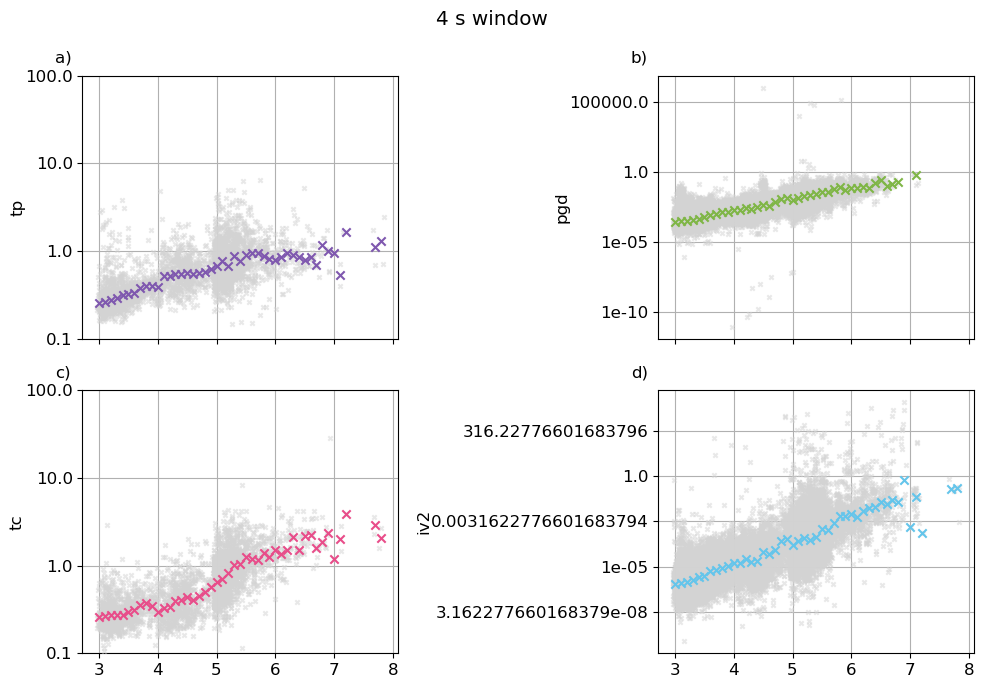

In [5]:

%matplotlib inline
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=2)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=2)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=2)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=2)

    plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f)
    plot_data_subplots_grey([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f)
        #plot_data_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = True)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True) '''

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


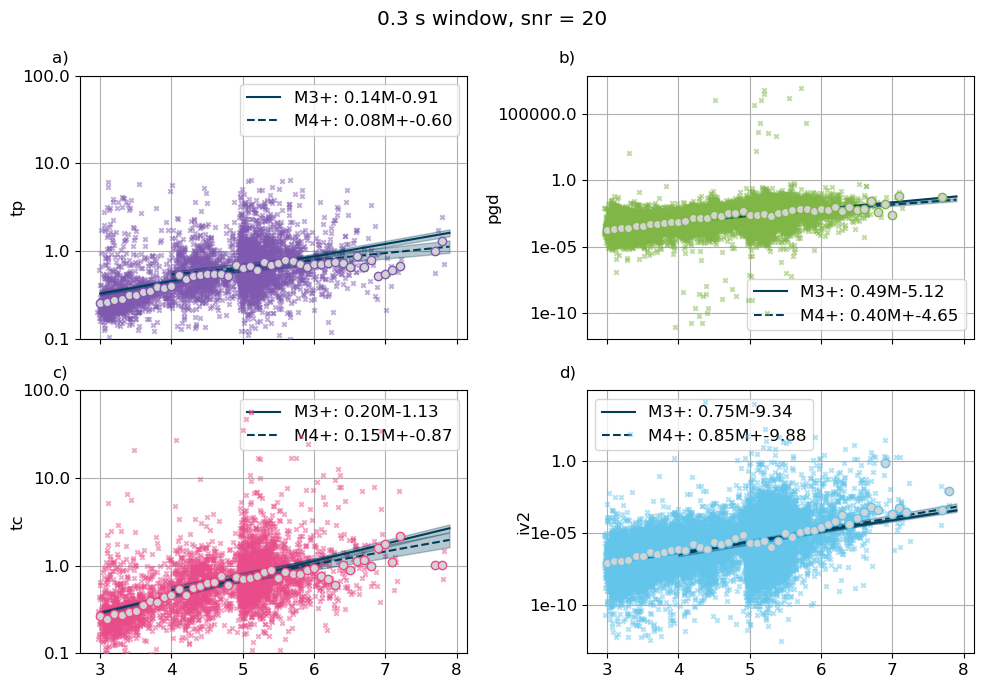

0.1414909813431199 0.08672337182998503
0.19709147447552341 0.15130616305579583
eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20


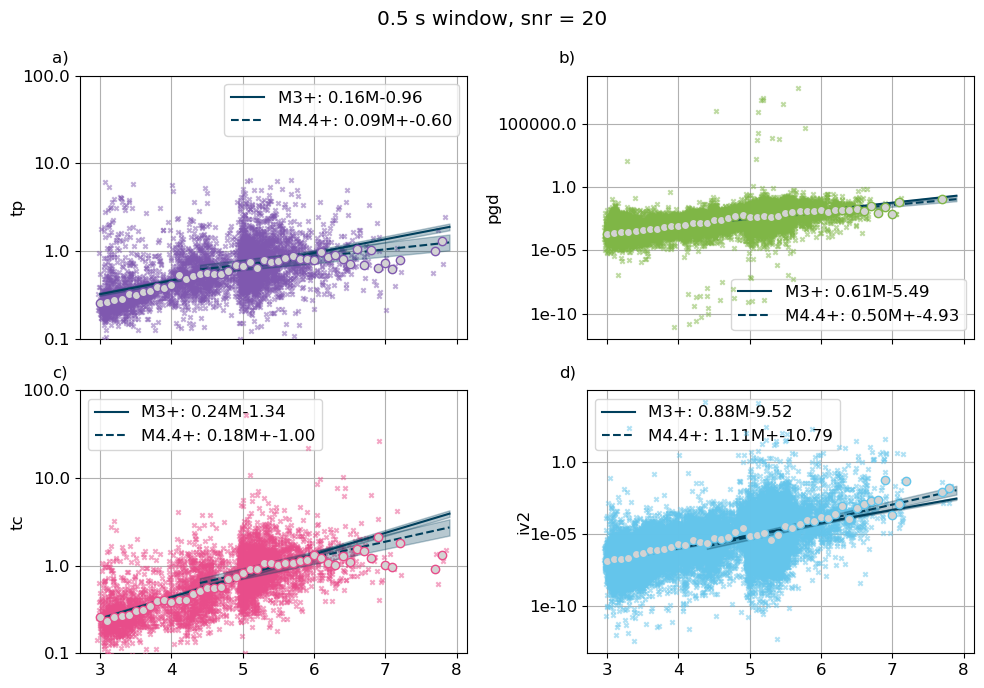

0.15668699324114946 0.11076588800427262
0.2443232319601717 0.22851949667498875
eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20


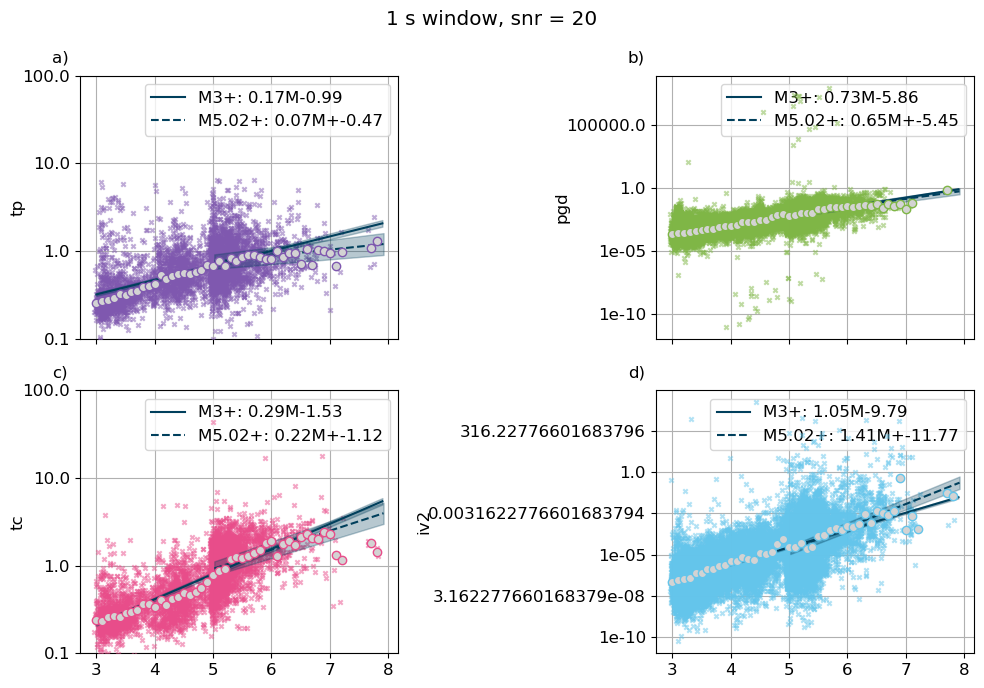

0.16540381185873126 0.12506536955858752
0.28646092372017956 0.3322553148630296
eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20


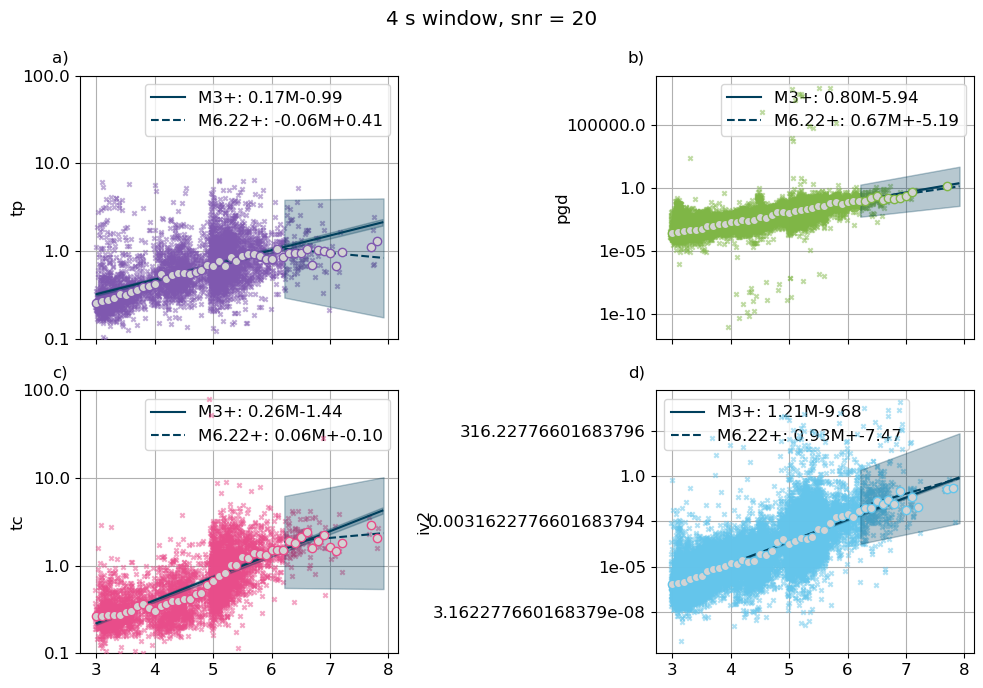

0.1672324348825743 0.1302670114502632
0.2621911254598995 0.3437425602809903


In [7]:
%matplotlib inline
for f in filenames:
    for n_stations in [1]:#,2,5,10]:
        print(f)
        df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, mag_lim,n=n_stations)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, save = True, show = True)
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots_all_on_one_no_n_shaded(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True) 
        print(tp_params[0][0],tp_params[0][9])
        print(tc_params[0][0],tc_params[0][9])


i=0
i=1
in else
in else
i=0
i=1
in else
in else
i=0
i=1
in else
in else
i=0
i=1
in else
in else


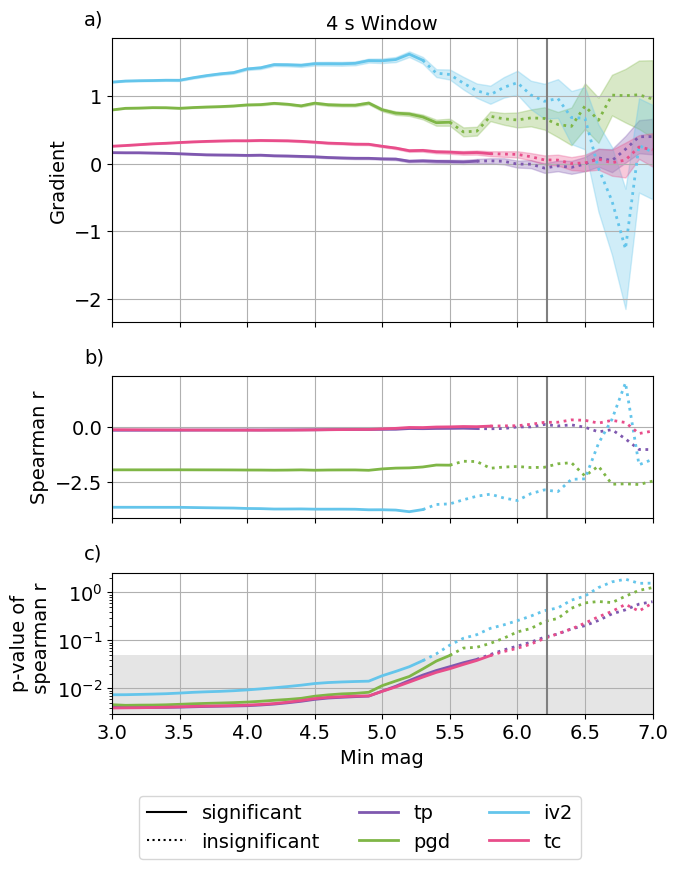

In [14]:
from spearman_plotting_func import *
plot_spearman_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = False)

In [8]:
list_tp_all = list(df.tp_max)

In [12]:
for i in range(len(df.tp_max)):
    if type(len(df.tp_max[i])) != int:
        print(i)

In [15]:
def name_to_time(f):
    l = f.split('_')
    time = l[2][:-1]
    if time == '1' or time == '4':
        return time
    else:
        time = time[0]+'.'+time[1]
        return time

def name_to_snr(f):
    l = f.split('_')
    snr = l[-1]
    if snr[0:3]=='snr':
        return snr[3:]
    
def name_to_blank(f):
    l = f.split('_')
    blank = l[9]
    return blank

In [16]:
%matplotlib inline
for f in filenames:
    #print(f)
    time = name_to_time(f)
    snr = name_to_snr(f)
    blank = name_to_blank(f)
    
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)

    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tp_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
    tp_pearson = pearson
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_pgd_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    pgd_pearson = pearson
    pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tc_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
    tc_pearson = pearson
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_iv2_mag_lim(df, mag_lim)
        #print(len(x[y==0]))
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
    iv2_pearson = pearson
    
    headers=["","M3+", "M4+", "M4.4+","M5+","M6.2+"]

    a = [[tp_pearson[i] for i in [0,10,14,20,32]],
         [tc_pearson[i] for i in [0,10,14,20,32]],
         [iv2_pearson[i] for i in [0,10,14,20,32]],
         [pgd_pearson[i] for i in [0,10,14,20,32]]]

    rowIDs = ['tp','tc','iv2','pgd']
    print('\\begin{table}[ht]')
    print('\centering')
    print(tabulate(a, tablefmt="latex", floatfmt=".2f",showindex=rowIDs, headers = headers))
    print(f'\caption{{Percentage of varience explained by a linear least squares fit. Window = {time}, blank = {blank}, snr = {snr}}}')
    print(f'\label{{table:varience_{time}_{blank}_{snr}}}')
    print('\end{table}')

\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
\hline
     &   M3+ &   M4+ &   M4.4+ &   M5+ &   M6.2+ \\
\hline
 tp  &  0.44 &  0.18 &    0.11 &  0.06 &   -0.07 \\
 tc  &  0.53 &  0.26 &    0.19 &  0.13 &    0.01 \\
 iv2 &  0.45 &  0.28 &    0.26 &  0.31 &    0.24 \\
 pgd &  0.56 &  0.27 &    0.17 &  0.18 &    0.26 \\
\hline
\end{tabular}
\caption{Percentage of varience explained by a linear least squares fit. Window = 0.3, blank = 0, snr = 20}
\label{table:varience_0.3_0_20}
\end{table}
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
\hline
     &   M3+ &   M4+ &   M4.4+ &   M5+ &   M6.2+ \\
\hline
 tp  &  0.49 &  0.23 &    0.16 &  0.09 &   -0.09 \\
 tc  &  0.67 &  0.43 &    0.31 &  0.19 &    0.02 \\
 iv2 &  0.55 &  0.33 &    0.29 &  0.33 &    0.23 \\
 pgd &  0.65 &  0.38 &    0.26 &  0.23 &    0.20 \\
\hline
\end{tabular}
\caption{Percentage of varience explained by a linear least squares fit. Window = 0.5, blank = 0, snr = 20}
\label{table:varience_0.5_0_20}
\end{table}


In [31]:
import scipy
from tabulate import tabulate

headers=["","M3+", "M4+", "M4.4+","M5+","M6+"]

a = [[tp_pearson[i] for i in [0,10,14,20,30]],
     [tc_pearson[i] for i in [0,10,14,20,30]],
     [iv2_pearson[i] for i in [0,10,14,20,30]],
     [pgd_pearson[i] for i in [0,10,14,20,30]]]

rowIDs = ['tp','tc','iv2','pgd']

print(tabulate(a, tablefmt="latex", floatfmt=".2f",showindex=rowIDs, headers = headers))

\begin{tabular}{lrrrrr}
\hline
     &   M3+ &   M4+ &   M4.4+ &   M5+ &   M6+ \\
\hline
 tp  &  0.44 &  0.18 &    0.11 &  0.06 &  0.03 \\
 tc  &  0.53 &  0.26 &    0.19 &  0.13 &  0.13 \\
 iv2 &  0.45 &  0.28 &    0.26 &  0.31 &  0.27 \\
 pgd &  0.56 &  0.27 &    0.17 &  0.18 &  0.17 \\
\hline
\end{tabular}


In [8]:
print(tp_pearson[0]**2*100, tp_pearson[10]**2*100,tp_pearson[14]**2*100,tp_pearson[20]**2*100,(tp_pearson[32]**2)*100)

19.626970134617196 3.0664544143259014 1.2340595672898562 0.4016135949560095 0.45771873915831285


In [18]:
print(tc_pearson[0]**2*100, tc_pearson[10]**2*100,tp_pearson[14]**2*100,tc_pearson[20]**2*100,tc_pearson[32]**2*100)

27.747975458740477 6.831314815280444 1.2340595672898562 1.7218822039758455 0.01896631830940134


In [21]:
print(iv2_pearson[0]**2*100, iv2_pearson[10]**2*100,iv2_pearson[14]**2*100,iv2_pearson[20]**2*100,iv2_pearson[32]**2*100)

20.63919952253621 7.60173745252901 6.718463624200123 9.730577568833167 5.77976851153043


In [22]:
print(pgd_pearson[0]**2*100, pgd_pearson[10]**2*100,tp_pearson[14]**2*100,pgd_pearson[20]**2*100,pgd_pearson[32]**2*100)

31.130687005155156 7.312319748196044 1.2340595672898562 3.3858239806779626 6.936491879568712


In [14]:
x_pgd = np.array(x_pgd)
y_pgd = np.array(y_pgd)

In [17]:
np.mean(y_pgd-(0.5*x_pgd-5.15))

-0.013631641945365076